### Statistics
     
<ol>
  Analysis of Variance 
</ol>

Basic imports of libraries: Numpy and Pandas <br>
Functions to call in questions

In [108]:
import pandas as pd
import seaborn as sns
import numpy as np
import random
import numpy as np
import scipy.stats as st
import math
import scipy.stats
from scipy import stats
import matplotlib.pyplot as plt
from scipy.stats import norm


def TestHypothesis(sample_size,sample_mean,sample_stdev,pop_mean,pop_stdev,twosided,conflevel):
    # find test statistic 
    ztest = False
    test_stat = 0
    p_val = 0
    conclusion = ''
    
    if pop_stdev is None:
        # use t-score with sample stdev 
        test_stat = (sample_mean-pop_mean)/(sample_stdev/np.sqrt(sample_size))
    else:
        if sample_size > 30:
        # use z-score
             test_stat = (sample_mean-pop_mean)/(pop_stdev/np.sqrt(sample_size))
             ztest = True 
        else:
        # use t-score with pop_stdev
             test_stat = (sample_mean-pop_mean)/(pop_stdev/np.sqrt(sample_size))
            
    print('test statistic :',test_stat,', z test:',ztest)
 
    if ztest: 
        p_val = st.norm.cdf(test_stat) 
    else:
        p_val = st.t.sf(np.abs(test_stat), sample_size-1)
       
    
    if twosided: 
        p_val = 2*p_val
    else:
        if (sample_mean > pop_mean):
            p_val = 1 - p_val 
      
        
    if p_val < conflevel:
        conclusion = 'Reject H0!'
    else:
        conclusion = 'Fail to reject H0!'
    
    axs = np.arange(-5,5, 0.1) # x from -6 to 6 in steps of 0.1 
    if abs(test_stat) > 3:
        axs = np.arange(1.25*-abs(test_stat),1.25*abs(test_stat), 0.1) # x from -6 to 6 in steps of 0.1
    ayz = 1 / np.sqrt(2 * np.pi) * np.exp(-axs ** 2 / 4.)

    plt.plot(axs,ayz, 'k')
    
    
   

    if twosided:
        plt.fill_between(axs,ayz,where = (axs<=-abs(test_stat)) | (axs>=abs(test_stat)))
                         
        boundval = norm.ppf(abs(0.5*conflevel),loc=0,scale=1)
        poscut = norm.ppf(1-abs(0.5*conflevel),loc=0,scale=1)
        plt.axvline(x=boundval,ymin=0,color='b', label='confidence level',linewidth=1)
        plt.axvline(x=poscut, color='b', label='confidence level',linewidth=1)
    else:
        if (sample_mean > pop_mean):
            poscut = norm.ppf(1-abs(conflevel),loc=0,scale=1)
            plt.axvline(x=poscut,ymin=0, color='b', label='confidence level',linewidth=1)
            plt.fill_between(axs,ayz,where = (axs>=abs(test_stat)) )
        else:
            negcut = norm.ppf(abs(conflevel),loc=0,scale=1)
            plt.axvline(x=negcut,ymin=0, color='b', label='confidence level',linewidth=1)
            plt.fill_between(axs,ayz,where = (axs<=-abs(test_stat)) )
   
    plt.show()
        
    return p_val,conclusion


----------
#### Hypothesis Testing

####  Two-tailed case:  Bulb manufacturer


A light bulb manufacturer claims that its' energy saving light bulbs last on average 60 days.


 H0 : The mean lifetime of a light bulb is 60 days. (µ = 60)
 
 H1 : The mean lifetime of a light bulb is not 60 days. (µ ≠ 60) 
 


A sampling of size 49 is collected from the production output with a mean of 56.5 days. Using confidence level 0.05, can we statically reject the claim of the manufacturer? Assume that the standard deviation of bulb lifetime is 9 days. 
 

test statistic : -2.722222222222222 , z test: True


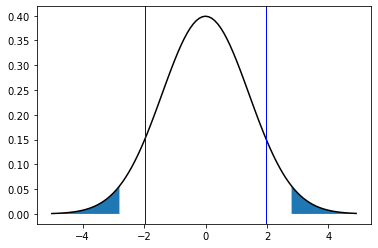

P-value:  0.006484452196655412  Test result:  Reject H0!


In [113]:
testreturn = TestHypothesis(49,56.5,None,60,9,True,0.05) # light bulb manufacturer, slide 36 
print('P-value: ',testreturn[0],' Test result: ',testreturn[1])

----------
#### One-tailed case:  Decision for a new supplier


The deviation in target length of the parts from the new supplier must be smaller than the target value of 1.5 mm. Otherwise, we will not change the current supplier. 

***Interest:*** Finding statistical evidence that the parts of the new supplier have significantly less deviation in order to change the supplier.   

A sampling of size 45 is collected from the products of the new supplier with a deviation of  1.2 mm. Using confidence level 0.01, can we statically reject the null hypothesis? Assume that the standard deviation of the products of the new supplier is 0.4 mm. Can we reject the null hypothesis in the favour of the new supplier?

                                   
H0: Mean of deviation of parts from new supplier is equal to 1.5 mm (µ = 1.5) 


H1: Mean of deviation of parts from new supplier is smaller than 1.5 mm (µ < 1.5)  

test statistic : -5.031152949374528 , z test: True


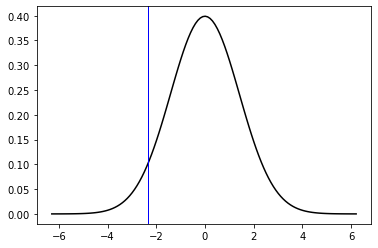

P-value:  2.4376949983627335e-07  Test result:  Reject H0!


In [110]:
testreturn = TestHypothesis(45,1.2,None,1.5,0.4,False,0.01) # Decision for a new supplier, slide 40
print('P-value: ',testreturn[0],' Test result: ',testreturn[1])


----------
##### One-tailed case:  Contamination of food

The Food and Drug Administration (FDA) sets acceptable levels of foreign substances that end up in our food and drink. The acceptable level for insect fragments in peanut butter is 3 fragments per 10 grams. 

***Interest:*** Finding problematic products in market; i.e. the food sampling that significantly contains fragments more than allowed in the regulation.

A sampling of size 50 is collected from the products of a food producer with a mean of 3.6 fragments per 10 grams. Using confidence level 0.05, can we statically reject the null hypothesis? Assume that the standard deviation of all products is √3. Can we reject the null hypothesis to penalize the food producer?

                                   
H0: The food contains 3 fragments of foreign substances per 10 gr. (µ <= 3)  <br>
H1: The food contains more than 3 fragments of foreign substances per 10 gr. (µ > 3)  

test statistic : 2.4494897427831788 , z test: True


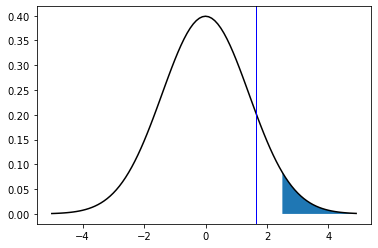

P-value:  0.00715293921771476  Test result:  Reject H0!


In [111]:
testreturn = TestHypothesis(50,3.6,None,3,np.sqrt(3),False,0.05) # Contamination of food, slide 43
print('P-value: ',testreturn[0],' Test result: ',testreturn[1])

##### One-tailed small-sample case:  Contamination of food

The Food and Drug Administration (FDA) sets acceptable levels of foreign substances that end up in our food and drink. The acceptable level for insect fragments in peanut butter is 3 fragments per 10 grams. 

***Interest:*** Finding problematic products in market; i.e. the food sampling that significantly contains fragments more than allowed in the regulation.

A sampling of size 20 is collected from the products of a food producer with a mean of 3.6 fragments per 10 grams. Using confidence level 0.05, can we statically reject the null hypothesis? Assume that the standard deviation of all products is √3. Can we reject the null hypothesis to penalize the food producer?


                                   
H0: The food contains 3 fragments of foreign substances per 10 gr. (µ <= 3) 


H1: The food contains more than 3 fragments of foreign substances per 10 gr. (µ > 3)  

test statistic : 1.5491933384829673 , z test: False


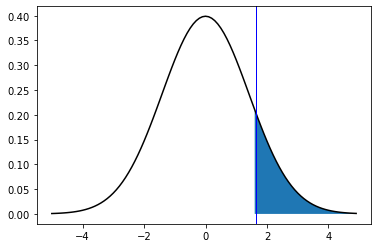

P-value:  0.9310841818128542  Test result:  Fail to reject H0!


In [112]:
testreturn= TestHypothesis(20,3.6,None,3,np.sqrt(3),False,0.05)   # Contamination of food-2, slide 48
print('P-value: ',testreturn[0],' Test result: ',testreturn[1])
